# ncsc.cyberforce.no
## Nasjonalt cybersikkerhetssenter (NCSC)
### DatEng
- [101] Statistikk UserAgents #1
- [102] Statistikk UserAgents #2
- [103] Prosentfordeling - netflow #1
- [104] parsing error
- [105] Visualisering #1

### THHH
- [121] Trusseljakt på Windows
- [122] Kodeknekkeren
- [123] Trusseljakt i Linux
- [124] Domain dominance
- [125] Beep Beeeeep Beep Beeeeeep

### TakAna
- [151] Trusseletterretning i det digitale rom
- [152] Sårbarhetsoversikt #1
- [153] Sårbarhetsoversikt #2
- [154] Rammeverk
- [155] Viktig faktor i en cyberopasjon

In [ ]:
import hashlib
def gen_resp(string:str=""):
    en=string.encode()
    hex_result = hashlib.md5(en)
    print("SNIFF{" + hex_result.hexdigest() + "}")

### 101 - Statistikk UserAgents #1
- file: "uaiai.txt"

Kan du bidra med å finne antall unike UserAgents i dette datasettet, i perioden fra og med søndag, 29. august, 2021 7:27:03 PM (UTC) og til og med fredag, 29. oktober, 2021 9:48:39 AM (UTC)?

In [ ]:
from datetime import datetime
import time

ts_start    = time.mktime( datetime(2021,8,29,17,27,3).timetuple() )
ts_end      = time.mktime( datetime(2021,10,29,7,48,39).timetuple() )


with open("files/uaiai.txt", "r") as datafile:
    content = datafile.read().strip().split("\n")
    data = []
    for line in content:
        line_data = line.split("|")
        ts = int(line_data[0])
        if line_data[2] == "":  #Skip blanks
            continue
        if ts_start <=  ts and ts_end >= ts:
            data.append( {"ts": datetime.fromtimestamp(ts), "md5": line_data[1], "ua": line_data[2]} )

unique = [el["ua"] for el in data]

unique = set(unique)
print( len(unique))
gen_resp( str(len(unique)) )

### 102 - Statistikk UserAgents #2
- file: "uaiai.txt"

Kan du finne ut hva som er den mest bruke UserAgenten i hele datasettet (- samme datasett som i oppgave #1)?

In [ ]:
uas = {}

with open("files/uaiai.txt", "r") as datafile:
    content = datafile.read().strip().split("\n")
    data = []
    for line in content:
        line_data = line.split("|")
        if line_data[2] == "":  #Skip blanks
            continue
        ua = line_data[2]
        if ua not in uas:
            uas.update({ua:1})
        else:
            uas[ua] += 1

cur = 0
winner = None
for ua, el in uas.items():
    if cur <  el:
        print( el, ua )
        winner = ua
        cur = el

gen_resp( winner )

### 103 - Prosentfordeling - netflow #1
- file: "theflow.csv"

1. Basert på følgende datasett, kan du finne hvor mange unike IP-adresser som eksisterer?
2. Datamodellen er bygget opp med følgende struktur: STARTTIME;SOURCE;DEST;PROTO;PACKETS;BYTES;DURATION
3. Eksempel på en linje: 2019-09-03T05:00:03;8.8.8.8:53;10.23.35.133:64352;udp;1;78;00:00:00

In [ ]:
IPS = []

with open("files/theflow.csv", "r") as datafile:
    content = datafile.read().strip().split("\n")
    for line in content[1:]:
        data = line.split(";")
        
        src_ip = data[1][ : data[1].find(":") ] if ":" in data[1] else data[1]
        if src_ip not in IPS:
            IPS.append( src_ip )
        
        dst_ip = data[2][ : data[2].find(":") ] if ":" in data[2] else data[2]
        if dst_ip not in IPS:
            IPS.append( dst_ip )

print( len(IPS) )

### 104 - parsing error
- files: "error-on-lines.csv"

1. Hvilke linjer har en feil som gjør at det ville vært problematisk å parse disse dataene? Headeren telles som linje 1.

    Avgi svaret som en kolonseparert liste uten mellomrom i stigende rekkefølge,
     eksempelvis: \"13:37\" - uten fnutter."

In [ ]:
from datetime import datetime

error_lines = []

def line_2_csv( line_str, sep=",", textmarker='"' ):
    columns = []

    text_index = 0
    while text_index < len(line_str):
        scan_2_marker = False
        if line_str[text_index] == textmarker:
            scan_2_marker = True
            count = line_str[text_index+1:].find(textmarker)
        else:
            count = line_str[text_index:].find(sep)
        if count == -1:
            count = len(line_str) - text_index
        
        if scan_2_marker:
            columns.append( line_str[text_index+1:text_index + count + 1] )
            text_index += count + 2
        else:
            columns.append( line_str[text_index:text_index+count] )
            text_index += count
        
        count = line_str[text_index:].find( sep )
        if count != -1:
            text_index += 1 + count #Skip separator
    return columns


csv = []
with open("files/error-on-lines.csv", "r") as datafile:
    content = datafile.read().strip().split("\n")
    for line_number, line_str in enumerate(content):
        line_str = line_str.strip()
        
        csv_line = line_2_csv( line_str )

        if len( csv_line ) != 4:
            error_lines.append( str(line_number+1) )
            continue
        if line_number == 0:
            continue

        csv_line[0] = datetime.strptime( csv_line[0], "%Y-%m-%dT%H:%M:%S.%f%z" )
        csv.append( csv_line )

print( ":".join(error_lines) )

### 105 - Visualisering #1
- file: "cyber.numbers"
1. Hva skal følgende tallrepresentasjon trolig fremstille?

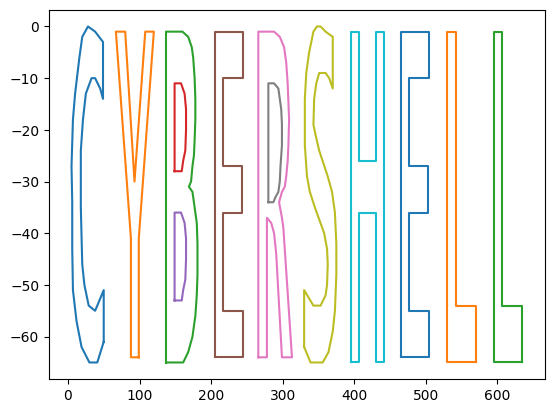

In [10]:
from matplotlib.pyplot import plot

content = [
    [[[50,61], [41,65], [30,65], [19,62], [12,57], [7,51], [6,43], [6,34], [5,27], [7,18], [10,13], [16,6], [20,2], [28,0], [38,1], [49,3], [49,14], [45,12], [38,10], [33,10], [25,13], [21,18], [18,24], [18,35], [20,46], [23,50], [29,54], [38,55], [44,53], [50,51], [50,61]]],
    [[[99,64], [88,64], [88,41], [67,1], [80,1], [93,30], [108,1], [120,1], [99,41], [99,64]]],
    [
        [[137,65], [137,1], [160,1], [168,2], [173,4], [175,6], [177,10], [178,14], [178,18], [177,22], [176,25], [174,27], [172,30], [169,31], [174,32], [176,34], [178,36], [180,38], [181,42], [181,48], [180,52], [178,56], [174,60], [168,63], [161,65], [137,65]],
        [[149,28], [149,11], [158,11], [163,13], [165,16], [165,20], [164,24], [161,26], [159,28], [149,28]],
        [[149,53], [149,36], [158,36], [163,38], [165,41], [165,45], [164,49], [161,51], [159,53], [149,53]]
    ],
    [[[205,64], [205,1], [244,1], [244,10], [217,10], [217,27], [243,27], [243,36], [217,36], [217,55], [244,55], [244,64], [205,64]]],
    [
        [[266,64], [266,1], [288,1], [296,2], [302,4], [305,7], [307,11], [309,18], [308,23], [307,26], [305,29], [303,31], [299,32], [295,34], [299,37], [301,39], [313,64], [299,64], [291,44], [288,40], [284,38], [278,37], [278,64], [266,64]],
        [[280,34], [280,11], [288,11], [294,12], [296,14], [298,16], [299,19], [299,23], [297,27], [296,30], [294,32], [290,33], [287,34], [280,34]]
    ],
    [[[330,62], [330,51], [343,54], [353,54], [360,52], [362,50], [363,46], [362,43], [358,40], [345,35], [338,32], [334,29], [331,23], [331,14], [333,9], [337,5], [343,1], [348,0], [353,0], [360,1], [370,2], [370,12], [365,10], [360,9], [351,9], [347,11], [344,14], [343,19], [346,21], [351,24], [363,29], [369,32], [373,36], [375,42], [375,48], [373,55], [370,59], [367,61], [364,63], [356,65], [347,65], [339,65], [330,62]]],
    [[[395,65], [395,1], [407,1], [407,26], [430,26], [430,1], [441,1], [441,65], [430,65], [430,36], [407,36], [407,65], [395,65]]],
    [[[465,64], [465,1], [504,1], [504,10], [477,10], [477,27], [503,27], [503,36], [477,36], [477,55], [504,55], [504,64], [465,64]]],
    [[[570,65], [530,65], [530,1], [542,1], [542,54], [570,54], [570,65]]],
    [[[635,65], [595,65], [595,1], [607,1], [607,54], [635,54], [635,65]]]
]

for line in content:
    for dataset in line:
        x_arr = [x for x,y in dataset]
        y_arr = [-1*y for x,y in dataset]
        plot(x_arr, y_arr)

## THHH 121 - Trusseljakt på Windows
Hvilke Event ID i sysmon er du opptatt av om du vil finne ut om programmer har blitt kjørt?
- Avgi svaret som heltall eksempelvis: \"20\" uten slash og fnutter.

`SVAR: 1`


## THHH 122 - Kodeknekkeren
Hva er følgende blobb: `UhM950EdPpUyBtSBse01J2pRSFRWQxuL28kaMCIYWfVSxdZpQdl4EgatCig67brnnjYzpHZ`

1. Base62 - brute force using all of the BaseXX methods
    - `58 20 70 62 20 70 20 72 6e 71 74 67 75 64 67 72 74 2e`
1. ROT11 - bruteforce attempt to solve it
    - `I am a cyberforce.`

## THHH 123 - Trusseljakt i Linux
Hva er OSquery-spørringen for å se tidligere påloggede brukerkontoer på Ubuntu?
- Avgi svaret som \"drop * from rand_tbl ;\" uten slash og fnutter.

**Svar:** `select * from last ;`

*Dumbass question as it uses an exact string matching function for validation*


## THHH 124 - Domain dominance
Ved mistanke om en Golden Ticket i domenet,
1. hvilke konto må man da resette passordet til,
1. og hvor mange ganger?
- Avgi svaret som \"kontonavn:antall\" uten slash og fnutter.

**Svar:** `KRBTGT:2`
- [Article on Golden Ticket](https://www.qomplx.com/qomplx-knowledge-golden-ticket-attacks-explained/)

## THHH 125 - Beep Beeeeep Beep Beeeeeep
Forstår du hva som blir kommunisert i scriptet continental_communications.ps1?

**Svar:** ``

#### Comments
- Morse code
- Special alphabet with weird encoding and inconsistent length
    - Possible manchester encoding
- Solution is something like `devguru kn1ws c?b3r`
- Alphabet is originally missing "d"
- Possible broken task

In [11]:
## ENCODER - START
encode = dict()
encode.update({"a" : ["1011", ".-"]})
encode.update({"b" : ["11010101", "-..."]})
encode.update({"c" : ["110101101", "-.-."]})
encode.update({"d" : ["110101", "-.."]})
encode.update({"e" : ["10", "."]})
encode.update({"f" : ["10101101", "..-."]})
encode.update({"g" : ["111101", "--."]})
encode.update({"h" : ["10101010", "....	"]})
encode.update({"i" : ["1010", ".."]})
encode.update({"j" : ["10111111", ".---"]})
encode.update({"k" : ["1101011", "-.-"]})
encode.update({"l" : ["10110101", ".-.."]})
encode.update({"m" : ["1111", "--"]})
encode.update({"n" : ["1101", "-."]})
encode.update({"o" : ["111111", "---"]})
encode.update({"p" : ["10111101", ".--."]})
encode.update({"q" : ["", ""]})
encode.update({"r" : ["101101", ".-."]})
encode.update({"s" : ["101010", "..."]})
encode.update({"t" : ["11", "-"]})
encode.update({"u" : ["101011", "..-"]})
encode.update({"v" : ["10101011", "...-"]})
encode.update({"w" : ["101111", ".--"]})
encode.update({"x" : ["110101011", "-..-"]})
encode.update({"y" : ["110101111", "-.--"]}) #-.--	
                       
encode.update({"z" : ["11110101", "--.."]})

encode.update({"1" : ["101101101", ".-..."]})
encode.update({"2" : ["1010110101", "..-.."]})
encode.update({"3" : ["1010101101", "...-."]})
encode.update({"4" : ["1010101011", "....-"]})
encode.update({"5" : ["11011011", "-..-"]})
encode.update({"6" : ["10101010101", "......"]})
encode.update({"7" : ["110110101", "-....."]})
encode.update({"8" : ["1101010101", "-...."]})
encode.update({"9" : ["110101011", "-..-"]})
encode.update({"0" : ["111111111111", "------"]})
encode.update({"&" : ["1011010101", ".-..."]})
encode.update({" " : ["2","2"]})


pText = "snifftech taking over 2022"
eText = "";
for p in pText:
    #print( f"{p}=>{encode[p][0]}")
    eText += encode[p][0]
    if p != " ":
        eText += "2"


print( f"Plaintext   : {pText}")
print( f"Encoded text: {eText}")

## ENCODER - END
 
eText = "1101012121010101121101101210101121011012101011221101011211012101101010121011011210101221101011012110110101012110101012101010110121011012"
print(eText)
oText = ""
for C in eText.split("2"):
    if C == "":
        print()
        oText += " "
        continue
    d = ""
    for c in C.split("0"):
        d += "-" if c == "11" else "."
    s = False
    for e in encode:
        if encode[e][1] == d:
            print( C, d, e)
            oText += e
            s=True
            break
    if not s:
        print(C, d, "?")
        oText += "?"

print( oText )

Plaintext   : snifftech taking over 2022
Encoded text: 101010211012101021010110121010110121121021101011012101010102211210112110101121010211012111101221111112101010112102101101221010110101211111111111121010110101210101101012
1101012121010101121101101210101121011012101011221101011211012101101010121011011210101221101011012110110101012110101012101010110121011012
110101 -.. d
1 . e
10101011 ...- v
1101101 --. g
101011 ..- u
101101 .-. r
101011 ..- u

1101011 -.- k
1101 -. n
1011010101 .-... 1
1011011 .-- w
10101 ... s

110101101 -.-. c
11011010101 --... ?
11010101 -... b
1010101101 ...-. 3
101101 .-. r

devguru kn1ws c?b3r 


### TakAna - 151 - Trusseletterretning i det digitale rom
Nedenfor er det listet en del TTPer (tactics, techniques & procedures) som blant annet benyttes til å beskrive trusselaktørenes handlemåter. En samling av slike TTPer kan dermed være med å beskrive en eller flere trusselaktører.
1. Hvilke trusselaktør eller gruppering kan beskrives med disse TTPene fra Mitre Att&ck:
    1. T1132/001 - Standard Encoding
    1. T1218/011 - rundll32
    1. S0020 - ChinaChopper
    1. T1560/001 - Archive via Utility
    1. S0073 - ASPXSpy
- links
    1. https://attack.mitre.org/techniques/enterprise/
    1. https://attack.mitre.org/software/


**Svar:** `hafnium`


### TakAna - 152 - Sårbarhetsoversikt #1
I desember 2021 rammet en sårbarhet nærmest hele internet, alt som var eksponert for å kunne behandle data-input fra internett kunne i teorien være sårbart om det benyttet en relativt vanlig komponent i mange systemer og programmer. 
1. Hvilket CVE-nummer fikk denne, avgi svaret på formen \"CVE-2021-XYZUI\" uten slash og fnutter.

**Svar:** `CVE-2021-44228`


### TakAna - 153 - Sårbarhetsoversikt #2
Noen sårbarheter får så stor oppmerksomhet at de blir døpt med egne navn i tillegg til CVE-ID, dette skjedde med en samling av sårbarheten i MS Exchange i starten av 2021.
1. Hvilket navn ble denne sårbarheten gitt?

**Svar:** `proxylogon`


### TakAna - 154 - Rammeverk
Innen cyber er det nødvendig å ha rammeverk som bidrar til å forklare hendelser, hvor steg en trusselaktør befinner seg i den konkrete cyberopasjonen, kapabilitetene til trusselaktører, defansive prosesser, o.l.
1. Hvilken prosess skal vi frem til her?
    - Den er som mange andre rammeverk adoptert til cyberdomenet, den skal bidra til å ta beslutninger på best mulig grunnlag, og består av fire hovedfaser.

**Svar:** ``


### TakAna - 155 - Viktig faktor i en cyberopasjon
For at en trusselaktør skal kunne gjennomføre en vellyket cyberoperasjon er det mange elementer som spiller inn, kanskje trenger de å kunne utnytte en sårbarhet i en programvare, eller de må få en person til å trykke på fil i en phishing-epost... men det er spesielt en kombinasjon som ofte er kritisk for trusselaktørene for at cyberoperasjonen skal bli vellykket mot IT-systemer og løsninger,
1. Hva er dette?

**Svar:** ``
